In [3]:
import numpy as np
import pandas as pd
from pandas.api.types import is_numeric_dtype
from pandas.api.types import is_string_dtype
from pandas.api.types import is_object_dtype
import random
import calendar
import matplotlib.pyplot as plt

In [4]:
pd.set_option('display.max.columns', 31)
pd.set_option('display.max.rows', 10000)
pd.set_option("display.float_format", lambda x: "%.2f" % x )

### Load Dataset

In [8]:
try:
    df = pd.read_csv('dataset.csv', encoding='utf-8')
except UnicodeDecodeError:
    try:
        df = pd.read_csv('dataset.csv', encoding='latin-1')
    except UnicodeDecodeError:
        df = pd.read_csv('dataset.csv', encoding='cp1252')

In [9]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


#### Staging Dataframe

In [25]:
df1 = df.copy()

In [26]:
df1.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


## Overview

In [28]:
df1.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [30]:
df1.shape

(2823, 25)

In [31]:
df1.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

In [33]:
#list columns
df1.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [38]:
#Count unique orders
df1['ORDERNUMBER'].nunique()

307

In [39]:
# List PRODUCTLINE
df1['PRODUCTLINE'].unique()

array(['Motorcycles', 'Classic Cars', 'Trucks and Buses', 'Vintage Cars',
       'Planes', 'Ships', 'Trains'], dtype=object)

In [40]:
#Count uniqe customers
df1['CUSTOMERNAME'].nunique()

92

## Data Cleaning

In [41]:
# Convert UpperCase Column names to LowerSnakeCase
df1.columns = df1.columns.str.lower().str.replace(" ", "_")
df1.head()

,ordernumber,quantityordered,priceeach,orderlinenumber,sales,orderdate,status,qtr_id,month_id,year_id,productline,msrp,productcode,customername,phone,addressline1,addressline2,city,state,postalcode,country,territory,contactlastname,contactfirstname,dealsize
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


### Check duplicates

In [34]:
#Check duplicates
df1.duplicated().sum()

0

### Check for null

In [97]:
#Check for null
df1.isnull().sum()

ordernumber          0
quantityordered      0
priceeach            0
orderlinenumber      0
sales                0
orderdate            0
status               0
qtr_id               0
month_id             0
year_id              0
productline          0
msrp                 0
productcode          0
customername         0
phone                0
addressline1         0
addressline2         0
city                 0
state                0
postalcode          76
country              0
territory            0
contactlastname      0
contactfirstname     0
dealsize             0
dtype: int64

### Cleaning the columns

In [48]:
df1.dtypes

ordernumber                  int64
quantityordered              int64
priceeach                  float64
orderlinenumber              int64
sales                      float64
orderdate           datetime64[ns]
status                      object
qtr_id                       int64
month_id                     int64
year_id                      int64
productline                 object
msrp                         int64
productcode                 object
customername                object
phone                       object
addressline1                object
addressline2                object
city                        object
state                       object
postalcode                  object
country                     object
territory                   object
contactlastname             object
contactfirstname            object
dealsize                    object
dtype: object

In [47]:
#Cleaning the date column
df1['orderdate'] = pd.to_datetime(df1['orderdate'])
df1['orderdate'] = df1['orderdate'].astype('datetime64[ns]')

In [50]:
df1['status'].unique()

array(['Shipped', 'Disputed', 'In Process', 'Cancelled', 'On Hold',
       'Resolved'], dtype=object)

In [51]:
df1['productline'].unique()

array(['Motorcycles', 'Classic Cars', 'Trucks and Buses', 'Vintage Cars',
       'Planes', 'Ships', 'Trains'], dtype=object)

In [53]:
#msrp - Manufacturer's Suggested Retail Price
df1['msrp'].unique()

array([ 95, 214, 118, 193, 136, 147, 194, 207, 150, 151, 117, 173,  79,
       115, 116, 141, 102,  53, 124, 157, 170,  77, 142, 163,  60, 122,
       127,  84, 168, 132, 101,  62,  86, 104, 169, 100,  80,  99, 146,
       105, 143,  92,  87, 121,  50, 148,  71,  73,  57, 112, 109,  33,
        76,  44,  69,  90,  35,  68,  37,  88,  85,  61,  65, 107,  83,
       140,  41,  97,  72,  96,  40,  54,  64,  43,  58,  81,  66,  91,
        74,  49], dtype=int64)

In [54]:
df1['productcode'].unique()

array(['S10_1678', 'S10_1949', 'S10_2016', 'S10_4698', 'S10_4757',
       'S10_4962', 'S12_1099', 'S12_1108', 'S12_1666', 'S12_2823',
       'S12_3148', 'S12_3380', 'S12_3891', 'S12_3990', 'S12_4473',
       'S12_4675', 'S18_1097', 'S18_1129', 'S18_1342', 'S18_1367',
       'S18_1589', 'S18_1662', 'S18_1749', 'S18_1889', 'S18_1984',
       'S18_2238', 'S18_2248', 'S18_2319', 'S18_2325', 'S18_2432',
       'S18_2581', 'S18_2625', 'S18_2795', 'S18_2870', 'S18_2949',
       'S18_2957', 'S18_3029', 'S18_3136', 'S18_3140', 'S18_3232',
       'S18_3259', 'S18_3278', 'S18_3320', 'S18_3482', 'S18_3685',
       'S18_3782', 'S18_3856', 'S18_4027', 'S18_4409', 'S18_4522',
       'S18_4600', 'S18_4668', 'S18_4721', 'S18_4933', 'S24_1046',
       'S24_1444', 'S24_1578', 'S24_1628', 'S24_1785', 'S24_1937',
       'S24_2000', 'S24_2011', 'S24_2022', 'S24_2300', 'S24_2360',
       'S24_2766', 'S24_2840', 'S24_2841', 'S24_2887', 'S24_2972',
       'S24_3151', 'S24_3191', 'S24_3371', 'S24_3420', 'S24_34

In [82]:
# phone - I removed space, dots and symbols from the phone number leaving only digits 
# because they dont all contain +
df1['phone'] = df1['phone'].str.replace(" ", "").str.replace("+", "").str.replace(".", "").str.replace("(", "").str.replace(")", "").str.replace("-", "")


In [88]:
df1['addressline2'] = df1['addressline2'].fillna("").str.replace(" ", "")

In [90]:
df1['state'] = df1['state'].fillna("").str.replace(" ", "")

In [92]:
df1['territory'] = df1['territory'].fillna("").str.replace(" ", "")

In [94]:
df1['dealsize'].unique()

array(['Small', 'Medium', 'Large'], dtype=object)

### Save to file

In [489]:
#Save to file
df1.to_csv("dataset_clean.csv", index = False)

# EDA

In [98]:
df1.head(100)

,ordernumber,quantityordered,priceeach,orderlinenumber,sales,orderdate,status,qtr_id,month_id,year_id,productline,msrp,productcode,customername,phone,addressline1,addressline2,city,state,postalcode,country,territory,contactlastname,contactfirstname,dealsize
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,,NYC,NY,10022,USA,,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26471555,59 rue de l'Abbaye,,Reims,,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,33146627555,27 rue du Colonel Pierre Avia,,Paris,,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,,Pasadena,CA,90003,USA,,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,,San Francisco,CA,NaN,USA,,Brown,Julie,Medium
5,10168,36,96.66,1,3479.76,2003-10-28,Shipped,4,10,2003,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,,Burlingame,CA,94217,USA,,Hirano,Juri,Medium
6,10180,29,86.13,9,2497.77,2003-11-11,Shipped,4,11,2003,Motorcycles,95,S10_1678,Daedalus Designs Imports,20161555,"184, chausse de Tournai",,Lille,,59000,France,EMEA,Rance,Martine,Small
7,10188,48,100.00,1,5512.32,2003-11-18,Shipped,4,11,2003,Motorcycles,95,S10_1678,Herkku Gifts,4722673215,"Drammen 121, PR 744 Sentrum",,Bergen,,N 5804,Norway,EMEA,Oeztan,Veysel,Medium
8,10201,22,98.57,2,2168.54,2003-12-01,Shipped,4,12,2003,Motorcycles,95,S10_1678,Mini Wheels Co.,6505555787,5557 North Pendale Street,,San Francisco,CA,NaN,USA,,Murphy,Julie,Small
9,10211,41,100.00,14,4708.44,2004-01-15,Shipped,1,1,2004,Motorcycles,95,S10_1678,Auto Canal Petit,147556555,"25, rue Lauriston",,Paris,,75016,France,EMEA,Perrier,Dominique,Medium


## Initializing Variables

In [100]:
df1.head(100)

,ordernumber,quantityordered,priceeach,orderlinenumber,sales,orderdate,status,qtr_id,month_id,year_id,productline,msrp,productcode,customername,phone,addressline1,addressline2,city,state,postalcode,country,territory,contactlastname,contactfirstname,dealsize
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,,NYC,NY,10022,USA,,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26471555,59 rue de l'Abbaye,,Reims,,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,33146627555,27 rue du Colonel Pierre Avia,,Paris,,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,,Pasadena,CA,90003,USA,,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,,San Francisco,CA,NaN,USA,,Brown,Julie,Medium
5,10168,36,96.66,1,3479.76,2003-10-28,Shipped,4,10,2003,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,,Burlingame,CA,94217,USA,,Hirano,Juri,Medium
6,10180,29,86.13,9,2497.77,2003-11-11,Shipped,4,11,2003,Motorcycles,95,S10_1678,Daedalus Designs Imports,20161555,"184, chausse de Tournai",,Lille,,59000,France,EMEA,Rance,Martine,Small
7,10188,48,100.00,1,5512.32,2003-11-18,Shipped,4,11,2003,Motorcycles,95,S10_1678,Herkku Gifts,4722673215,"Drammen 121, PR 744 Sentrum",,Bergen,,N 5804,Norway,EMEA,Oeztan,Veysel,Medium
8,10201,22,98.57,2,2168.54,2003-12-01,Shipped,4,12,2003,Motorcycles,95,S10_1678,Mini Wheels Co.,6505555787,5557 North Pendale Street,,San Francisco,CA,NaN,USA,,Murphy,Julie,Small
9,10211,41,100.00,14,4708.44,2004-01-15,Shipped,1,1,2004,Motorcycles,95,S10_1678,Auto Canal Petit,147556555,"25, rue Lauriston",,Paris,,75016,France,EMEA,Perrier,Dominique,Medium


In [99]:
#Color Palette
color_palette_50 =  [
    'red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan',
    'gold', 'teal', 'navy', 'magenta', 'lime', 'coral', 'indigo', 'salmon', 'maroon', 'turquoise',
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
    '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
    '#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99',
    '#e31a1c', '#fdbf6f', '#ff9896', '#c5b0d5', '#c49c94',
    '#9edae5', '#f7b6d2', '#dbdb8d', '#aec7e8', '#ffbb78',
    '#98df8a', '#ff6347', '#40e0d0', '#da70d6', '#87ceeb'
]

np.random.shuffle(color_palette_50)

In [522]:
def dimAnalysis(df, df_dim, df_meas):
    df_dimAnalysis = df.groupby([df_dim]).agg({df_meas: ['sum', 'mean']}).reset_index()
    measSumName = "{}_sum".format(df_meas)
    df_dimAnalysis[measSumName] = df_dimAnalysis[df_meas]['sum']
    measAvgName = "{}_avg".format(df_meas)
    df_dimAnalysis[measAvgName] = df_dimAnalysis[df_meas]['mean']
    df_dimAnalysis = df_dimAnalysis[[df_dim, measSumName, measAvgName]].sort_values([measSumName], ascending = False).reset_index(drop = True)
    measPctName = "{}_pct".format(df_meas)
    df_dimAnalysis[measPctName] = (df_dimAnalysis[measSumName] / df_dimAnalysis[measSumName].sum()) * 100
    return df_dimAnalysis

In [442]:
def dimAnalysis2(df, df_dim, df_meas):
    df_dimAnalysis = df.groupby([df_dim]).agg({df_meas: ['min', 'max']}).reset_index()
    measMinName = "{}_min".format(df_meas)
    df_dimAnalysis[measMinName] = df_dimAnalysis[df_meas]['min']
    measMaxName = "{}_max".format(df_meas)
    df_dimAnalysis[measMaxName] = df_dimAnalysis[df_meas]['max']
    df_dimAnalysis = df_dimAnalysis[[df_dim, measMinName, measMaxName]].sort_values([measMaxName], ascending = False).reset_index(drop = True)
    return df_dimAnalysis

In [589]:
def dateAnalysis(df, df_dim, df_meas):
    df_group = ['year_id', 'month_id', 'qtr_id']
    df_group.insert(0, df_dim) if df_dim != False else df_group
    df_dateAnalysis = df.groupby(df_group).agg({df_meas: ['sum', 'mean']}).reset_index()
    measSumName = "{}_sum".format(df_meas)
    df_dateAnalysis[measSumName] = df_dateAnalysis[df_meas]['sum']
    measAvgName = "{}_avg".format(df_meas)
    df_dateAnalysis[measAvgName] = df_dateAnalysis[df_meas]['mean']
    
    df_dim_index = df_group[1] if df_dim != False else df_group[0]
    order_ytotal = df_dateAnalysis[df_dim_index].apply(lambda x: df.groupby([df_dim_index])[df_meas].sum().reset_index().query("{} == {}".format(df_dim_index, x))[df_meas].values[0])
    #order_ytotal =  df_dateAnalysis.groupby([df_dim_index])[df_meas].transform('sum')
    measYTotalName = "{}_ytotal".format(df_meas)
    df_dateAnalysis[measYTotalName] = order_ytotal
    measPctName = "{}_pct".format(df_meas)
    df_dateAnalysis[measPctName] = (df_dateAnalysis[measSumName] / order_ytotal) * 100
    df_group.extend([measSumName, measAvgName, measYTotalName, measPctName])
    df_dateAnalysis = df_dateAnalysis[df_group]
    df_dateAnalysis = df_dateAnalysis.droplevel(1, axis=1)
    return df_dateAnalysis

In [507]:
def dateAnalysis2(df, df_dim, df_meas):
    df_dateAnalysis = df.groupby([df_dim, 'year_id', 'month_id'])[df_meas].sum().reset_index()
    df_dateAnalysisMax = df_dateAnalysis.groupby([df_dim, 'year_id'])[df_meas].max().reset_index()
    df_dateAnalysisMax = df_dateAnalysisMax.merge(df_dateAnalysis, on = [df_dim, 'year_id', df_meas])
    df_dateAnalysisMax = df_dateAnalysisMax.rename(columns = {
        "month_id" : "max_{}_month_id".format(df_meas),
        df_meas : "max_{}".format(df_meas)
    })
    df_dateAnalysisMin = df_dateAnalysis.groupby([df_dim, 'year_id'])[df_meas].min().reset_index()
    df_dateAnalysisMin = df_dateAnalysisMin.merge(df_dateAnalysis, on = [df_dim, 'year_id', df_meas])
    df_dateAnalysisMin = df_dateAnalysisMin.rename(columns = {
        "month_id" : "min_{}_month_id".format(df_meas),
        df_meas : "min_{}".format(df_meas)
    })
    df_dateAnalysisMax = df_dateAnalysisMax.merge(df_dateAnalysisMin, on = [df_dim, 'year_id'])
    return df_dateAnalysisMax

In [506]:
def dateAnalysis3(df, df_dim, df_meas):
    df_dateAnalysis = df.groupby([df_dim, 'year_id', 'month_id'])[df_meas].sum().reset_index()
    measGrowthName = '{}_growth'.format(df_meas)
    df_dateAnalysis[measGrowthName] = df_dateAnalysis[df_meas] - df_dateAnalysis[df_meas].shift(1)
    df_dateAnalysis[measGrowthName] = df_dateAnalysis[measGrowthName].fillna(0)
    measGrowthPctName = '{}_growth_pct'.format(df_meas)
    df_dateAnalysis[measGrowthPctName] = (df_dateAnalysis[measGrowthName] / df_dateAnalysis[df_meas].shift(1)) * 100
    df_dateAnalysis[measGrowthPctName] = df_dateAnalysis[measGrowthPctName].fillna(0)
    return df_dateAnalysis

## Detect Outliers

In [102]:
q1 = df1['priceeach'].quantile(0.25)
q3 = df1['priceeach'].quantile(0.75)

#interquantile range
iqr = q3 - q1
lowerBound = q1 - 1.5 * iqr
upperBound = q3 + 1.5 * iqr

#outilier
outliers = df1[(df1['priceeach'] < lowerBound) | (df1['priceeach'] > upperBound)]
outliers

,ordernumber,quantityordered,priceeach,orderlinenumber,sales,orderdate,status,qtr_id,month_id,year_id,productline,msrp,productcode,customername,phone,addressline1,addressline2,city,state,postalcode,country,territory,contactlastname,contactfirstname,dealsize


## Date Analysis

In [202]:
df1.head(1)

,ordernumber,quantityordered,priceeach,orderlinenumber,sales,orderdate,status,qtr_id,month_id,year_id,productline,msrp,productcode,customername,phone,addressline1,addressline2,city,state,postalcode,country,territory,contactlastname,contactfirstname,dealsize
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,,NYC,NY,10022,USA,,Yu,Kwai,Small


In [298]:
u_year = df1['year_id'].unique()
u_year = np.sort(u_year)
u_year

array([2003, 2004, 2005], dtype=int64)

In [211]:
u_qtr = df1['qtr_id'].unique()
np.sort(u_qtr)

array([1, 2, 3, 4], dtype=int64)

In [216]:
u_month = df1['month_id'].unique()
u_month = np.sort(u_month)
u_monthAbbrName = ["{}".format(calendar.month_abbr[x]) for x in u_month]
u_monthAbbrName

['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']

In [590]:
df1_DateOrder = dateAnalysis(df1, False, "quantityordered")
df1_DateSales = dateAnalysis(df1, False, "sales")

df1_DateAnalysis = df1_DateSales.merge(df1_DateOrder, on = ['year_id', 'month_id', 'qtr_id'])
df1_DateAnalysis = df1_DateAnalysis.reset_index(drop = True)
df1_DateAnalysis

,year_id,month_id,qtr_id,sales_sum,sales_avg,sales_ytotal,sales_pct,quantityordered_sum,quantityordered_avg,quantityordered_ytotal,quantityordered_pct
0,2003,1,1,129753.60,3327.02,3516979.54,3.69,1357,34.79,34612,3.92
1,2003,2,1,140836.19,3435.03,3516979.54,4.00,1449,35.34,34612,4.19
2,2003,3,1,174504.90,3490.10,3516979.54,4.96,1755,35.10,34612,5.07
3,2003,4,2,201609.55,3476.03,3516979.54,5.73,1993,34.36,34612,5.76
4,2003,5,2,192673.11,3321.95,3516979.54,5.48,2017,34.78,34612,5.83
5,2003,6,2,168082.56,3653.97,3516979.54,4.78,1649,35.85,34612,4.76
6,2003,7,3,187731.88,3754.64,3516979.54,5.34,1725,34.50,34612,4.98
7,2003,8,3,197809.30,3410.51,3516979.54,5.62,1974,34.03,34612,5.70
8,2003,9,3,263973.36,3473.33,3516979.54,7.51,2510,33.03,34612,7.25
9,2003,10,4,568290.97,3596.78,3516979.54,16.16,5515,34.91,34612,15.93


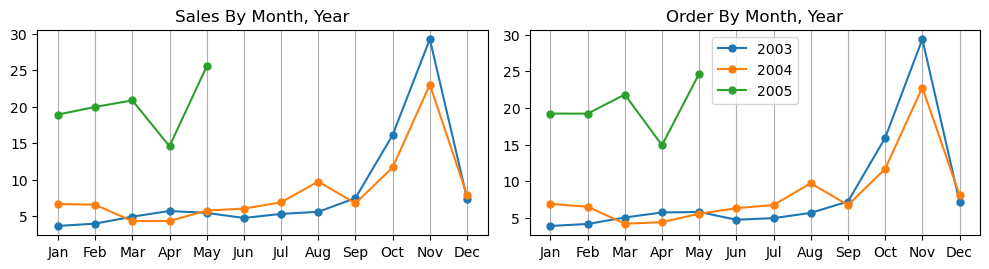

In [397]:
plt_df = df1_DateAnalysis
plt.figure(figsize = (10,5))
plt.subplot(221)
for iYear in u_year:
    this_df = plt_df.query('year_id	== {}'.format(iYear))
    plt_x = np.flip(this_df['month_id'])
    plt_y = np.flip(this_df['sales_pct'])
    bar = plt.plot(plt_x, plt_y, label = iYear, marker = 'o', markersize = 5)
    
plt.title("Sales By Month, Year")

plt.xticks(u_month, ["{}".format(calendar.month_abbr[x]) for x in u_month], rotation = 'horizontal')
plt.grid(axis = 'x')


plt.subplot(222)
for iYear in u_year:
    this_df = plt_df.query('year_id	== {}'.format(iYear))
    plt_x = np.flip(this_df['month_id'])
    plt_y = np.flip(this_df['quantityordered_pct'])
    bar = plt.plot(plt_x, plt_y, label = iYear, marker = 'o', markersize = 5)
    
plt.title("Order By Month, Year")

plt.xticks(u_month, ["{}".format(calendar.month_abbr[x]) for x in u_month], rotation = 'horizontal')
plt.grid(axis = 'x')


plt.legend()
plt.tight_layout()

plt.show()

#### Report

**This analysis show the orders count on on monthly basis**
1. The dataset only captured orders from 2003 - 2005 and the
2005 only captured 5 months

2. This analysis shows that the highest orders was made in the 11th month

3. The lowest orders was made in the early months of the year

## Customer Analysis

In [535]:
# quantityordered by customername
df1_customerOrder = dimAnalysis(df1, 'customername', 'quantityordered')

# sales by customername
df1_customerSales =dimAnalysis(df1, 'customername', 'sales')

df1_customerSales = df1_customerSales.merge(df1_customerOrder, on = ['customername'])
df1_customerSales = df1_customerSales.sort_values(['sales_pct'], ascending = False).reset_index(drop = True)
df1_customerSales50 = df1_customerSales.head(50)
df1_customerSales50

,customername,sales_sum,sales_avg,sales_pct,quantityordered_sum,quantityordered_avg,quantityordered_pct
,,,,,,,
0,Euro Shopping Channel,912294.11,3522.37,9.09,9327,36.01,9.41
1,Mini Gifts Distributors Ltd.,654858.06,3638.10,6.53,6366,35.37,6.43
2,"Australian Collectors, Co.",200995.41,3654.46,2.00,1926,35.02,1.94
3,Muscle Machine Inc,197736.94,4119.52,1.97,1775,36.98,1.79
4,La Rochelle Gifts,180124.90,3398.58,1.80,1832,34.57,1.85
5,"Dragon Souveniers, Ltd.",172989.68,4023.02,1.72,1524,35.44,1.54
6,Land of Toys Inc.,164069.44,3348.36,1.64,1631,33.29,1.65
7,The Sharp Gifts Warehouse,160010.27,4000.26,1.59,1656,41.40,1.67
8,"AV Stores, Co.",157807.81,3094.27,1.57,1778,34.86,1.79


#### Visualization

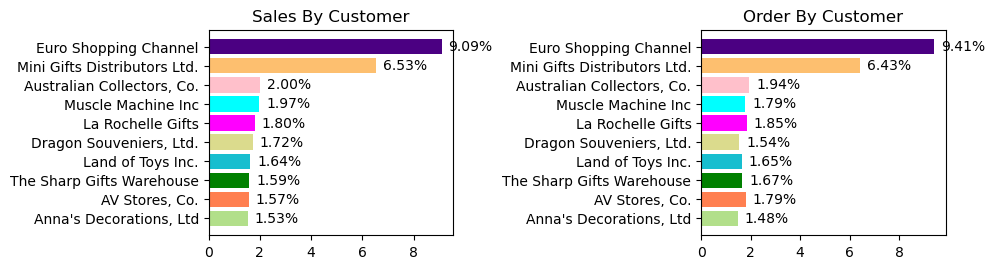

In [199]:
limit = 10
plt_df = df1_customerSales50[:limit]
plt.figure(figsize = (10,5))

plt.subplot(221)
plt_x = np.flip(plt_df['customername'])
plt_y = np.flip(plt_df['sales_pct'])
bar = plt.barh(plt_x, plt_y, color = color_palette_50)
#plt.plot(df1_customerSales['customername'], df1_customerSales['quantityordered_avg'])
plt.bar_label(bar, ["{:.2f}%".format(x) for x in plt_y], rotation = "horizontal", padding = 5, color = "#000")
plt.yticks(rotation = 'horizontal')
plt.title("Sales By Customer")

plt.subplot(222)
plt_x = np.flip(plt_df['customername'])
plt_y = np.flip(plt_df['quantityordered_pct'])
bar = plt.barh(plt_x, plt_y, color = color_palette_50)
#plt.plot(df1_customerSales['customername'], df1_customerSales['quantityordered_avg'])
plt.bar_label(bar, ["{:.2f}%".format(x) for x in plt_y], rotation = "horizontal", padding = 5, color = "#000")
plt.yticks(rotation = 'horizontal')
plt.title("Order By Customer")

plt.tight_layout()
plt.show()

#### Report

This report shows the customer making the most order and the one making the least. 
From this analysis

__Top 5 customers with the most orders__

1.   __Euro Shopping Channel__	9327 Orders	36.01 Avg. Order

2.	__Mini Gifts Distributors Ltd.__	6366 Orders	35.37 Avg. Order

3.	__Australian Collectors, Co.__	1926 Orders	35.02 Avg. Order

4.	__La Rochelle Gifts__	1832 Orders, 34.57 Avg. Order

5.	__AV Stores, Co.__	1778 Orders, 34.86 Avg. Order

## Status Analysis

### Overview

In [147]:
df1.head()

,ordernumber,quantityordered,priceeach,orderlinenumber,sales,orderdate,status,qtr_id,month_id,year_id,productline,msrp,productcode,customername,phone,addressline1,addressline2,city,state,postalcode,country,territory,contactlastname,contactfirstname,dealsize
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,,NYC,NY,10022,USA,,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26471555,59 rue de l'Abbaye,,Reims,,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,33146627555,27 rue du Colonel Pierre Avia,,Paris,,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,,Pasadena,CA,90003,USA,,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,,San Francisco,CA,NaN,USA,,Brown,Julie,Medium


In [146]:
df1['status'].unique()

array(['Shipped', 'Disputed', 'In Process', 'Cancelled', 'On Hold',
       'Resolved'], dtype=object)

### Status Analysis

In [195]:
# quantityordered by status
df1_StatusOrder = dimAnalysis(df1, 'status', 'quantityordered')

# sales by status
df1_StatusSales =dimAnalysis(df1, 'status', 'sales')

df1_StatusSales = df1_StatusSales.merge(df1_StatusOrder, on = ['status'])
df1_StatusSales

,status,sales_sum,sales_avg,sales_pct,quantityordered_sum,quantityordered_avg,quantityordered_pct
,,,,,,,
0,Shipped,9291501.08,3550.44,92.61,91403,34.93,92.26
1,Cancelled,194487.48,3241.46,1.94,2038,33.97,2.06
2,On Hold,178979.19,4067.71,1.78,1879,42.70,1.90
3,Resolved,150718.28,3206.77,1.50,1660,35.32,1.68
4,In Process,144729.96,3530.00,1.44,1490,36.34,1.50
5,Disputed,72212.86,5158.06,0.72,597,42.64,0.60


#### Visualization

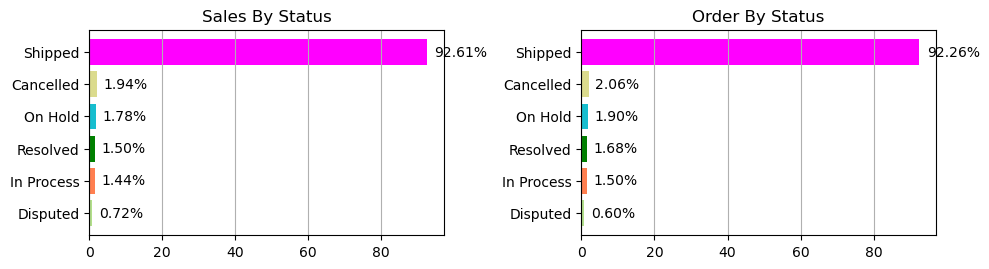

In [196]:
plt_df = df1_StatusSales
plt.figure(figsize = (10,5))

plt.subplot(221)
plt_x = np.flip(plt_df['status'])
plt_y = np.flip(plt_df['sales_pct'])
bar = plt.barh(plt_x, plt_y, color = color_palette_50)
plt.bar_label(bar, ["{:.2f}%".format(x) for x in plt_y], rotation = "horizontal", padding = 5, color = "#000")
plt.title("Sales By Status")
plt.xticks(rotation = 'horizontal')
plt.grid(axis = 'x')


plt.subplot(222)
plt_x = np.flip(plt_df['status'])
plt_y = np.flip(plt_df['quantityordered_pct'])
plt.barh(plt_x, plt_y, color = color_palette_50)
plt.bar_label(bar, ["{:.2f}%".format(x) for x in plt_y], rotation = "horizontal", padding = 5, color = "#000")
plt.title("Order By Status")
plt.xticks(rotation = 'horizontal')
plt.grid(axis = 'x')

plt.tight_layout()
plt.show()

#### Report

**This analysis show the orders count on status**

1. **Shipped**&nbsp; &nbsp; &nbsp; &nbsp; 91403 Orders	(92.26%)
2. **Cancelled**&nbsp; &nbsp; &nbsp; &nbsp; 2038 Orders	(2.06%)
3. **On Hold**&nbsp; &nbsp; &nbsp; &nbsp; 1879 Orders	(1.90%)
4. **Resolved**&nbsp; &nbsp; &nbsp; &nbsp; 1660 Orders	(1.68%)
5. **In Process**&nbsp; &nbsp; &nbsp; &nbsp; 1490 Orders	(1.50%)
6. **Disputed**&nbsp; &nbsp; &nbsp; &nbsp; 597 Orders	(0.60%)

This shows that there are 92.2% of good ordered that were shipped and 2% orders that were cancelled

###  Sales By Status, Date

In [567]:
df1_StatusDateOrder = dateAnalysis(df1, "status", "quantityordered")
df1_StatusDateSales = dateAnalysis(df1, "status", "sales")

df1_StatusDateAnalysis = df1_StatusDateSales.merge(df1_StatusDateOrder, on = ['status', 'year_id', 'month_id', 'qtr_id'])
df1_StatusDateAnalysis = df1_StatusDateAnalysis.reset_index(drop = True)
df1_StatusDateAnalysis

,status,year_id,month_id,qtr_id,sales_sum,sales_avg,sales_pct,quantityordered_sum,quantityordered_avg,quantityordered_pct
0,Cancelled,2003,10,4,48710.92,3044.43,1.39,550,34.38,1.59
1,Cancelled,2004,5,2,45357.66,3239.83,0.96,454,32.43,0.97
2,Cancelled,2004,6,2,100418.90,3347.30,2.13,1034,34.47,2.21
3,Disputed,2005,4,2,26012.87,8670.96,1.45,174,58.00,0.99
4,Disputed,2005,5,2,46199.99,4200.00,2.58,423,38.45,2.40
5,In Process,2005,5,2,144729.96,3530.00,8.08,1490,36.34,8.45
6,On Hold,2004,11,4,26260.21,4376.70,0.56,217,36.17,0.46
7,On Hold,2005,4,2,104402.09,4350.09,5.83,1156,48.17,6.56
8,On Hold,2005,5,2,48316.89,3451.21,2.70,506,36.14,2.87
9,Resolved,2003,10,4,28550.59,3568.82,0.81,288,36.00,0.83


#### Visualization

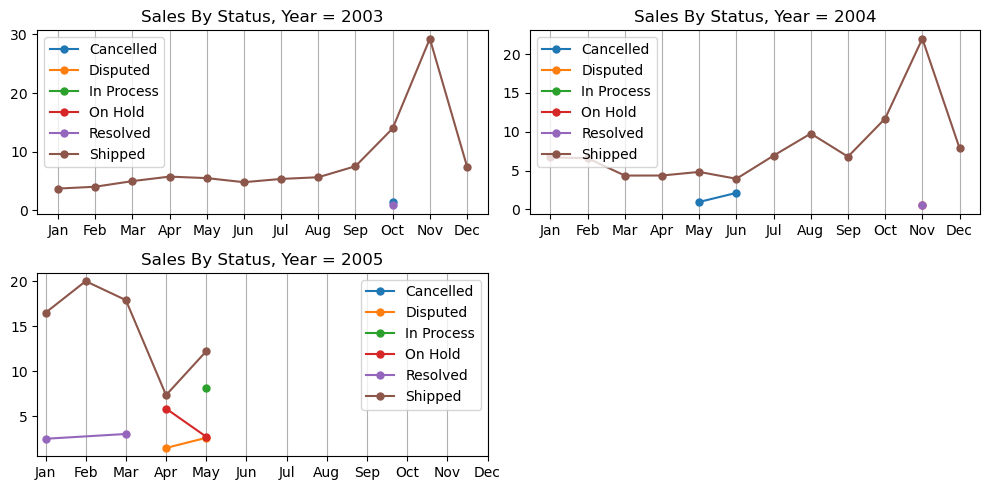

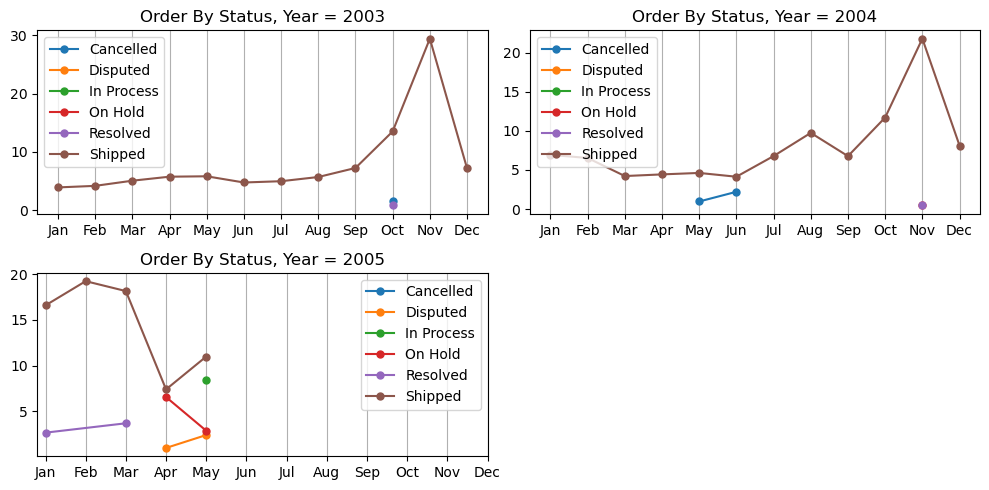

In [432]:
plt_df = df1_StatusDateAnalysis
plt.figure(figsize = (10,5))
subplot_id = 221
for iYear in u_year:
    plt.subplot(subplot_id)
    
    for iStatus in plt_df['status'].unique():
        this_df = plt_df.query("year_id	== {} & status == '{}'".format(iYear, iStatus))
        plt_x = np.flip(this_df['month_id'])
        plt_y = np.flip(this_df['sales_pct'])
        bar = plt.plot(plt_x, plt_y, label = iStatus, marker = 'o', markersize = 5)
    subplot_id = subplot_id + 1
    plt.title("Sales By Status, Year = {}".format(iYear))
    
    plt.xticks(u_month, ["{}".format(calendar.month_abbr[x]) for x in u_month], rotation = 'horizontal')
    plt.grid(axis = 'x')
    plt.legend()


plt.tight_layout()
plt.show()


plt.figure(figsize = (10,5))
subplot_id = 221
for iYear in u_year:
    plt.subplot(subplot_id)
    
    for iStatus in plt_df['status'].unique():
        this_df = plt_df.query("year_id	== {} & status == '{}'".format(iYear, iStatus))
        plt_x = np.flip(this_df['month_id'])
        plt_y = np.flip(this_df['quantityordered_pct'])
        bar = plt.plot(plt_x, plt_y, label = iStatus, marker = 'o', markersize = 5)
    subplot_id = subplot_id + 1
    plt.title("Order By Status, Year = {}".format(iYear))
    
    plt.xticks(u_month, ["{}".format(calendar.month_abbr[x]) for x in u_month], rotation = 'horizontal')
    plt.grid(axis = 'x')
    plt.legend()


plt.tight_layout()
plt.show()

In [ ]:
df_StatusDateOrder = df1.groupby(['year_id', 'month_id', 'qtr_id']).agg({"quantityordered": ['sum', 'mean']}).reset_index()
df1_DateOrder['quantityordered_sum'] = df1_DateOrder['quantityordered']['sum']
df1_DateOrder['quantityordered_avg'] = df1_DateOrder['quantityordered']['mean']
order_ytotal = df1_DateOrder['year_id'].apply(lambda x: df1.groupby(['year_id'])['quantityordered'].sum().reset_index().query("year_id == {}".format(x))['quantityordered'].values[0])
df1_DateOrder['quantityordered_pct'] = (df1_DateOrder['quantityordered_sum'] / order_ytotal) * 100
df1_DateOrder = df1_DateOrder[['year_id', 'month_id', 'qtr_id', 'quantityordered_sum', 'quantityordered_avg', 'quantityordered_pct']]
df1_DateOrder = df1_DateOrder.droplevel(1, axis=1)

df1_DateSales = df1.groupby(['year_id', 'month_id', 'qtr_id']).agg({"sales": ['sum', 'mean']}).reset_index()
df1_DateSales['sales_sum'] = df1_DateSales['sales']['sum']
df1_DateSales['sales_avg'] = df1_DateSales['sales']['mean']
sales_ytotal = df1_DateSales['year_id'].apply(lambda x: df1.groupby(['year_id'])['sales'].sum().reset_index().query("year_id == {}".format(x))['sales'].values[0])
df1_DateSales['sales_pct'] = (df1_DateSales['sales_sum'] / sales_ytotal) * 100
df1_DateSales = df1_DateSales[['year_id', 'month_id', 'qtr_id', 'sales_sum', 'sales_avg', 'sales_pct']]
df1_DateSales = df1_DateSales.droplevel(1, axis=1)

df1_DateSales = df1_DateSales.merge(df1_DateOrder, on = ['year_id', 'month_id', 'qtr_id'])
df1_DateSales = df1_DateSales.reset_index(drop = True)
df1_DateSales

#### Report

## Dealsize Analysis

In [186]:
df1.iloc[10:11]

,ordernumber,quantityordered,priceeach,orderlinenumber,sales,orderdate,status,qtr_id,month_id,year_id,productline,msrp,productcode,customername,phone,addressline1,addressline2,city,state,postalcode,country,territory,contactlastname,contactfirstname,dealsize
10,10223,37,100.00,1,3965.66,2004-02-20,Shipped,1,2,2004,Motorcycles,95,S10_1678,"Australian Collectors, Co.",0395204555,636 St Kilda Road,Level3,Melbourne,Victoria,3004,Australia,APAC,Ferguson,Peter,Medium


In [187]:
df1['dealsize'].unique()

array(['Small', 'Medium', 'Large'], dtype=object)

In [569]:
# quantityordered by dealsize
df1_DealSizeOrder = dimAnalysis(df1, 'dealsize', 'quantityordered')

# sales by dealsize
df1_DealSizeSales =dimAnalysis(df1, 'dealsize', 'sales')

df1_DealSizeSales = df1_DealSizeSales.merge(df1_DealSizeOrder, on = ['dealsize'])
df1_DealSizeSales

,dealsize,sales_sum,sales_avg,sales_pct,quantityordered_sum,quantityordered_avg,quantityordered_pct
,,,,,,,
0,Medium,6087432.24,4398.43,60.68,52519,37.95,53.01
1,Small,2643077.35,2061.68,26.34,39134,30.53,39.50
2,Large,1302119.26,8293.75,12.98,7414,47.22,7.48


In [228]:
np.random.shuffle(color_palette_50)

#### Visualization

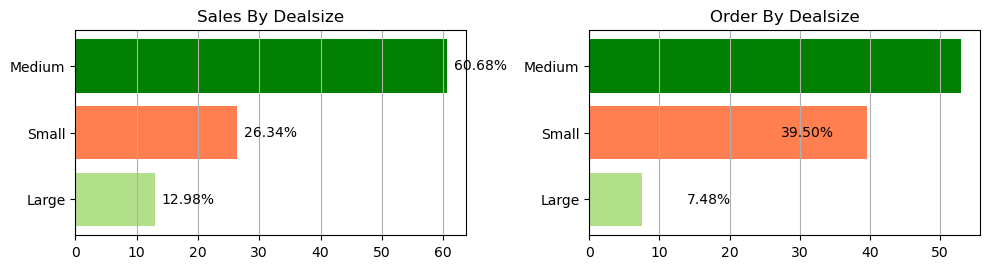

In [201]:
plt_df = df1_DealSizeSales
plt.figure(figsize = (10,5))

plt.subplot(221)
plt_x = np.flip(plt_df['dealsize'])
plt_y = np.flip(plt_df['sales_pct'])
bar = plt.barh(plt_x, plt_y, color = color_palette_50)
plt.bar_label(bar, ["{:.2f}%".format(x) for x in plt_y], rotation = "horizontal", padding = 5, color = "#000")
plt.title("Sales By Dealsize")
plt.xticks(rotation = 'horizontal')
plt.grid(axis = 'x')


plt.subplot(222)
plt_x = np.flip(plt_df['dealsize'])
plt_y = np.flip(plt_df['quantityordered_pct'])
plt.barh(plt_x, plt_y, color = color_palette_50)
plt.bar_label(bar, ["{:.2f}%".format(x) for x in plt_y], rotation = "horizontal", padding = 5, color = "#000")
plt.title("Order By Dealsize")
plt.xticks(rotation = 'horizontal')
plt.grid(axis = 'x')

plt.tight_layout()
plt.show()

#### Report

**This analysis show the orders count on dealsize**

1. **Medium**&nbsp; &nbsp; &nbsp; &nbsp; 52519 Orders	(53.01%)
2. **Small**&nbsp; &nbsp; &nbsp; &nbsp; 39134 Orders	(39.50%)
3. **Large**&nbsp; &nbsp; &nbsp; &nbsp; 7414 Orders	(7.48%)

This shows that are 53.01% of orders are medium dealsize and 7.48% are large dealsize

## ProductLine Analysis

In [347]:
df1.head(1)

,ordernumber,quantityordered,priceeach,orderlinenumber,sales,orderdate,status,qtr_id,month_id,year_id,productline,msrp,productcode,customername,phone,addressline1,addressline2,city,state,postalcode,country,territory,contactlastname,contactfirstname,dealsize
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,,NYC,NY,10022,USA,,Yu,Kwai,Small


In [346]:
df1['productline'].unique()

array(['Motorcycles', 'Classic Cars', 'Trucks and Buses', 'Vintage Cars',
       'Planes', 'Ships', 'Trains'], dtype=object)

### Univariate Analysis

In [349]:
# quantityordered by productline
df1_ProductLineOrder = dimAnalysis(df1, 'productline', 'quantityordered')

# sales by productline
df1_ProductLineSales = dimAnalysis(df1, 'productline', 'sales')

df1_ProductLineAnalysis = df1_ProductLineSales.merge(df1_ProductLineOrder, on = ['productline'])
df1_ProductLineAnalysis

,productline,sales_sum,sales_avg,sales_pct,quantityordered_sum,quantityordered_avg,quantityordered_pct
,,,,,,,
0,Classic Cars,3919615.66,4053.38,39.07,33992,35.15,34.31
1,Vintage Cars,1903150.84,3135.34,18.97,21069,34.71,21.27
2,Motorcycles,1166388.34,3523.83,11.63,11663,35.24,11.77
3,Trucks and Buses,1127789.84,3746.81,11.24,10777,35.80,10.88
4,Planes,975003.57,3186.29,9.72,10727,35.06,10.83
5,Ships,714437.13,3053.15,7.12,8127,34.73,8.20
6,Trains,226243.47,2938.23,2.26,2712,35.22,2.74


#### Visualization

In [292]:
np.random.shuffle(color_palette_50)

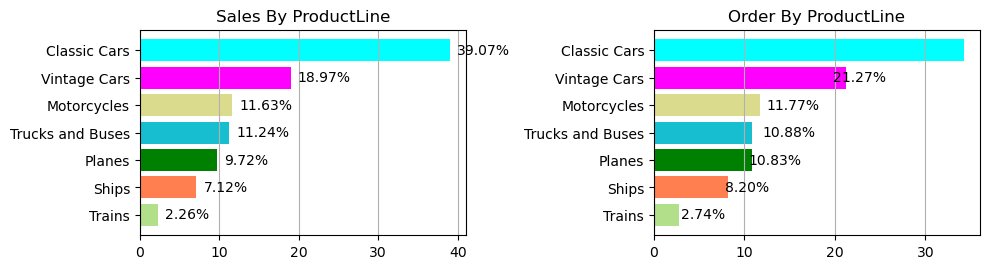

In [350]:
plt_df = df1_ProductLineAnalysis
plt.figure(figsize = (10,5))

plt.subplot(221)
plt_x = np.flip(plt_df['productline'])
plt_y = np.flip(plt_df['sales_pct'])
bar = plt.barh(plt_x, plt_y, color = color_palette_50)
plt.bar_label(bar, ["{:.2f}%".format(x) for x in plt_y], rotation = "horizontal", padding = 5, color = "#000")
plt.title("Sales By ProductLine")
plt.xticks(rotation = 'horizontal')
plt.grid(axis = 'x')


plt.subplot(222)
plt_x = np.flip(plt_df['productline'])
plt_y = np.flip(plt_df['quantityordered_pct'])
plt.barh(plt_x, plt_y, color = color_palette_50)
plt.bar_label(bar, ["{:.2f}%".format(x) for x in plt_y], rotation = "horizontal", padding = 5, color = "#000")
plt.title("Order By ProductLine")
plt.xticks(rotation = 'horizontal')
plt.grid(axis = 'x')

plt.tight_layout()
plt.show()

### Product Sales by Date

In [570]:
df1_ProductDateOrder = dateAnalysis(df1, "productline", "quantityordered")
df1_ProductDateSales = dateAnalysis(df1, "productline", "sales")

df1_ProductDateAnalysis = df1_ProductDateSales.merge(df1_ProductDateOrder, on = ['productline', 'year_id', 'month_id', 'qtr_id'])
df1_ProductDateAnalysis = df1_ProductDateAnalysis.reset_index(drop = True)
df1_ProductDateAnalysis

,productline,year_id,month_id,qtr_id,sales_sum,sales_avg,sales_pct,quantityordered_sum,quantityordered_avg,quantityordered_pct
0,Classic Cars,2003,1,1,41191.78,4119.18,1.17,334,33.40,0.96
1,Classic Cars,2003,2,1,20464.41,6821.47,0.58,120,40.00,0.35
2,Classic Cars,2003,3,1,105026.68,4039.49,2.99,929,35.73,2.68
3,Classic Cars,2003,4,2,59873.60,4989.47,1.70,465,38.75,1.34
4,Classic Cars,2003,5,2,98179.48,3506.41,2.79,934,33.36,2.70
5,Classic Cars,2003,6,2,50256.79,5025.68,1.43,338,33.80,0.98
6,Classic Cars,2003,7,3,94055.58,4275.25,2.67,765,34.77,2.21
7,Classic Cars,2003,8,3,48406.61,4840.66,1.38,339,33.90,0.98
8,Classic Cars,2003,9,3,137666.87,3720.73,3.91,1139,30.78,3.29
9,Classic Cars,2003,10,4,241145.43,3889.44,6.86,2032,32.77,5.87


#### Visualization

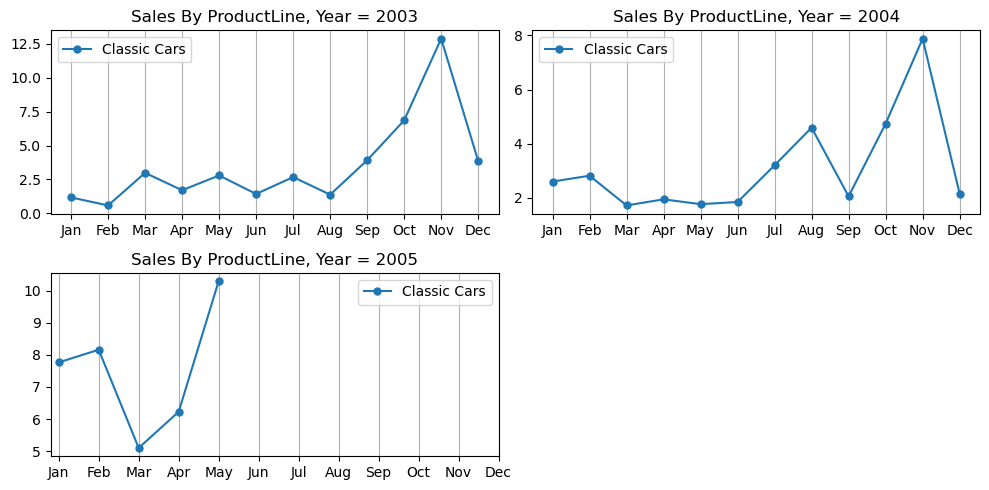

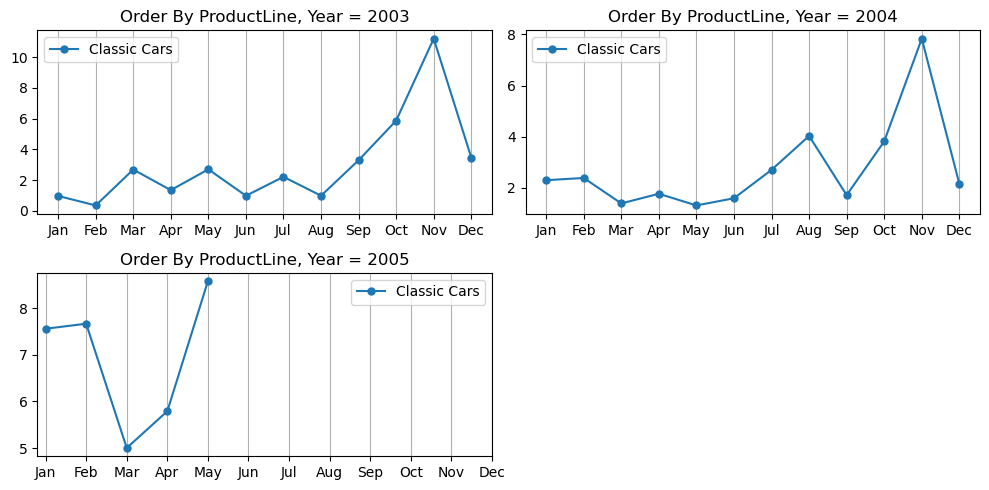

In [439]:
plt_df = df1_ProductDateAnalysis
plt.figure(figsize = (10,5))
productLines = plt_df['productline'].unique()
productLines = ['Motorcycles', 'Classic Cars', 'Trucks and Buses', 'Vintage Cars', 'Planes', 'Ships', 'Trains']
productLines = ['Classic Cars']
subplot_id = 221
for iYear in u_year:
    plt.subplot(subplot_id)
    
    for iProductLine in productLines:
        this_df = plt_df.query("year_id	== {} & productline == '{}'".format(iYear, iProductLine))
        plt_x = np.flip(this_df['month_id'])
        plt_y = np.flip(this_df['sales_pct'])
        bar = plt.plot(plt_x, plt_y, label = iProductLine, marker = 'o', markersize = 5)
            
    subplot_id = subplot_id + 1
    plt.title("Sales By ProductLine, Year = {}".format(iYear))
    
    plt.xticks(u_month, ["{}".format(calendar.month_abbr[x]) for x in u_month], rotation = 'horizontal')
    plt.grid(axis = 'x')
    plt.legend()


plt.tight_layout()
plt.show()


plt.figure(figsize = (10,5))
subplot_id = 221
for iYear in u_year:
    plt.subplot(subplot_id)
    
    for iProductLine in productLines:
        this_df = plt_df.query("year_id	== {} & productline == '{}'".format(iYear, iProductLine))
        plt_x = np.flip(this_df['month_id'])
        plt_y = np.flip(this_df['quantityordered_pct'])
        bar = plt.plot(plt_x, plt_y, label = iProductLine, marker = 'o', markersize = 5)
            
    subplot_id = subplot_id + 1
    plt.title("Order By ProductLine, Year = {}".format(iYear))
    
    plt.xticks(u_month, ["{}".format(calendar.month_abbr[x]) for x in u_month], rotation = 'horizontal')
    plt.grid(axis = 'x')
    plt.legend()


plt.tight_layout()
plt.show()

### Maximum / Minimum Sales by ProductLine

In [571]:
df1_ProductLineMaxMinSales = dateAnalysis2(df1, "productline", "sales")
df1_ProductLineMaxMinOrder = dateAnalysis2(df1, "productline", "quantityordered")
df1_ProductLineMaxMinSales = df1_ProductLineMaxMinSales.merge(df1_ProductLineMaxMinOrder, on = ['productline', 'year_id'])
df1_ProductLineMaxMinSales

,productline,year_id,max_sales,max_sales_month_id,min_sales,min_sales_month_id,max_quantityordered,max_quantityordered_month_id,min_quantityordered,min_quantityordered_month_id
0,Classic Cars,2003,452924.37,11,20464.41,2,3879,11,120,2
1,Classic Cars,2004,372231.89,11,81144.00,3,3669,11,610,5
2,Classic Cars,2005,184385.11,5,91389.86,3,1513,5,882,3
3,Motorcycles,2003,109345.50,11,2642.01,6,1118,11,23,6
4,Motorcycles,2004,151711.86,11,20846.98,12,1403,11,214,7
5,Motorcycles,2005,59862.22,4,39389.70,5,579,4,336,5
6,Planes,2003,69180.74,10,7120.96,12,725,10,86,12
7,Planes,2004,121130.70,11,23032.84,4,1325,11,274,4
8,Planes,2005,79735.05,3,11262.27,1,883,3,175,1
9,Ships,2003,79174.80,11,20564.19,9,921,11,234,9


In [924]:
df1ProductLineSales1 = df1.groupby(['PRODUCTLINE', 'YEAR_ID', 'MONTH_ID'])['SALES'].sum().reset_index()
df1ProductLineSales2 = df1ProductLineSales1.groupby(['PRODUCTLINE', 'YEAR_ID', 'MONTH_ID'])['SALES'].sum().reset_index()
df1ProductLineSales2 = df1ProductLineSales2.groupby(['PRODUCTLINE', 'YEAR_ID']).max().reset_index()[['PRODUCTLINE', 'YEAR_ID', 'SALES']]
df1ProductLineSales2 = df1ProductLineSales2.merge(df1ProductLineSales1[['PRODUCTLINE', 'MONTH_ID', 'SALES']], on = ['PRODUCTLINE', 'SALES'])
df1ProductLineSales2 = df1ProductLineSales2[['PRODUCTLINE', 'YEAR_ID', 'MONTH_ID', 'SALES']]
df1ProductLineSales2 = df1ProductLineSales2.sort_values(['YEAR_ID', 'SALES'], ascending = [True, False])
df1ProductLineSales2

,PRODUCTLINE,YEAR_ID,MONTH_ID,SALES
0,Classic Cars,2003,11,452924.37
18,Vintage Cars,2003,11,184673.40
15,Trucks and Buses,2003,11,127062.92
3,Motorcycles,2003,11,109345.50
9,Ships,2003,11,79174.80
6,Planes,2003,10,69180.74
12,Trains,2003,11,22523.40
1,Classic Cars,2004,11,372231.89
19,Vintage Cars,2004,11,233990.34
4,Motorcycles,2004,11,151711.86


#### Visualization

In [1005]:
np.random.shuffle(color_palette_50)

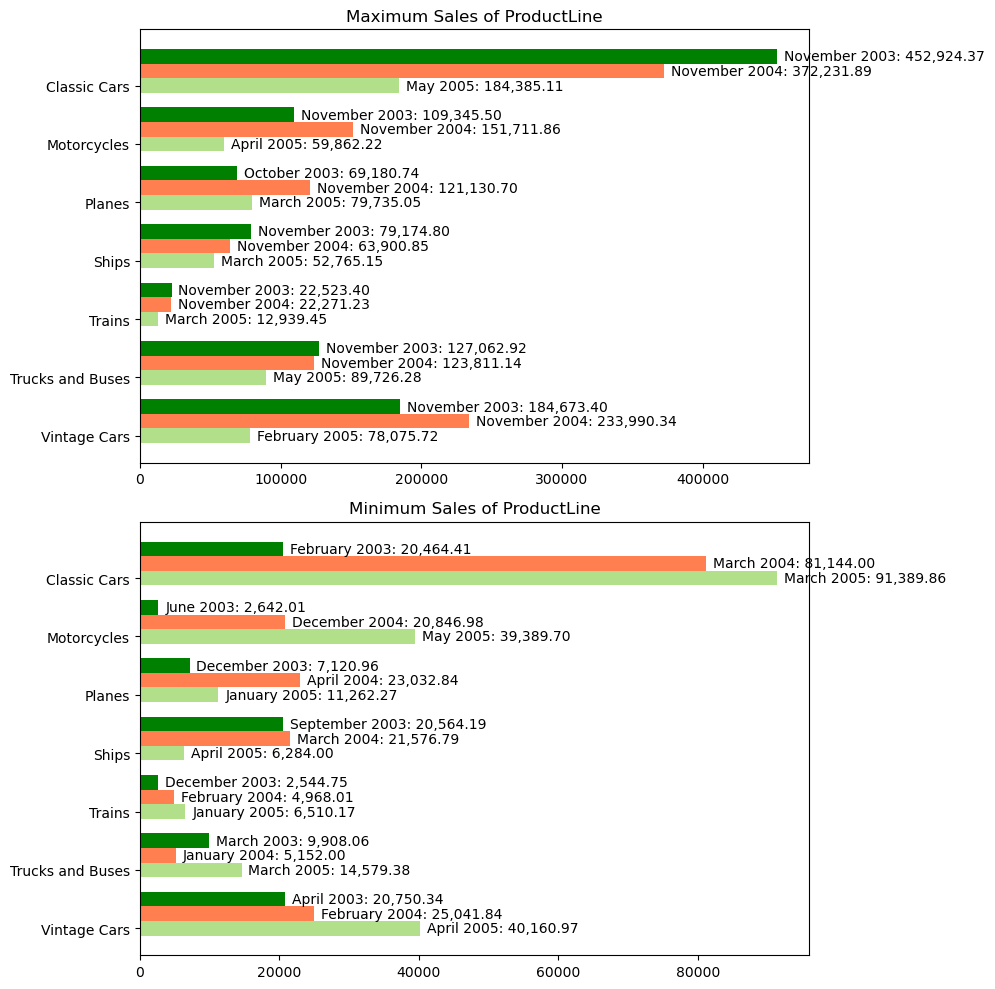

In [488]:
plt.figure(figsize = (10,10))
productLines = df1_ProductLineMaxMinSales['productline'].unique()
productLines = np.flip(productLines)
productLinesRange = np.arange(len(productLines))

#Maximum Sales of ProductLine
plt.subplot(211)
for iProductLine in productLinesRange:
    thisDf = df1_ProductLineMaxMinSales[df1_ProductLineMaxMinSales['productline'] == productLines[iProductLine]]
    c = 0
    for iYear in np.flip(df1_ProductLineMaxMinSales['year_id'].unique()):
        thisDfSales = thisDf[thisDf['year_id'] == iYear]['max_sales']
        thisDfSalesMY = thisDf[thisDf['year_id'] == iYear][['max_sales_month_id', 'max_sales']]

        productLineOffset = iProductLine + (c / 4)
        bar = plt.barh(productLineOffset, thisDfSales, height = 0.25, color = color_palette_50[c], align = 'center')
        this_month = calendar.month_name[thisDfSalesMY['max_sales_month_id'].values[0]]
        plt.bar_label(bar, ["{} {}: {:,.2f}".format(this_month, iYear, thisDfSales.values[0])], rotation='horizontal', padding = 5)
        plt.yticks(np.flip(productLinesRange), ["{}".format(df1_ProductLineMaxMinSales['productline'].unique()[x]) for x in productLinesRange])
        c += 1
plt.title("Maximum Sales of ProductLine")

#Minimum Sales of ProductLine
plt.subplot(212)
for iProductLine in productLinesRange:
    thisDf = df1_ProductLineMaxMinSales[df1_ProductLineMaxMinSales['productline'] == productLines[iProductLine]]
    c = 0
    for iYear in np.flip(df1_ProductLineMaxMinSales['year_id'].unique()):
        thisDfSales = thisDf[thisDf['year_id'] == iYear]['min_sales']
        thisDfSalesMY = thisDf[thisDf['year_id'] == iYear][['min_sales_month_id', 'min_sales']]

        productLineOffset = iProductLine + (c / 4)
        bar = plt.barh(productLineOffset, thisDfSales, height = 0.25, color = color_palette_50[c], align = 'center')
        this_month = calendar.month_name[thisDfSalesMY['min_sales_month_id'].values[0]]
        plt.bar_label(bar, ["{} {}: {:,.2f}".format(this_month, iYear, thisDfSales.values[0])], rotation='horizontal', padding = 5)
        plt.yticks(np.flip(productLinesRange), ["{}".format(df1_ProductLineMaxMinSales['productline'].unique()[x]) for x in productLinesRange])
        c += 1
plt.title("Minimum Sales of ProductLine")

plt.tight_layout()
plt.show()

### ProductLine Growth analysis

In [490]:
df1.head(1)

,ordernumber,quantityordered,priceeach,orderlinenumber,sales,orderdate,status,qtr_id,month_id,year_id,productline,msrp,productcode,customername,phone,addressline1,addressline2,city,state,postalcode,country,territory,contactlastname,contactfirstname,dealsize
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,,NYC,NY,10022,USA,,Yu,Kwai,Small


In [512]:
df1_ProductGrowthSales = dateAnalysis3(df1, 'productline', 'sales')
df1_ProductGrowthOrder = dateAnalysis3(df1, 'productline', 'quantityordered')

df1_ProductGrowthAnalysis = df1_ProductGrowthSales.merge(df1_ProductGrowthOrder, on  = ['productline', 'year_id', 'month_id'])
df1_ProductGrowthAnalysis

,productline,year_id,month_id,sales,sales_growth,sales_growth_pct,quantityordered,quantityordered_growth,quantityordered_growth_pct
0,Classic Cars,2003,1,41191.78,0.00,0.00,334,0.00,0.00
1,Classic Cars,2003,2,20464.41,-20727.37,-50.32,120,-214.00,-64.07
2,Classic Cars,2003,3,105026.68,84562.27,413.22,929,809.00,674.17
3,Classic Cars,2003,4,59873.60,-45153.08,-42.99,465,-464.00,-49.95
4,Classic Cars,2003,5,98179.48,38305.88,63.98,934,469.00,100.86
5,Classic Cars,2003,6,50256.79,-47922.69,-48.81,338,-596.00,-63.81
6,Classic Cars,2003,7,94055.58,43798.79,87.15,765,427.00,126.33
7,Classic Cars,2003,8,48406.61,-45648.97,-48.53,339,-426.00,-55.69
8,Classic Cars,2003,9,137666.87,89260.26,184.40,1139,800.00,235.99
9,Classic Cars,2003,10,241145.43,103478.56,75.17,2032,893.00,78.40


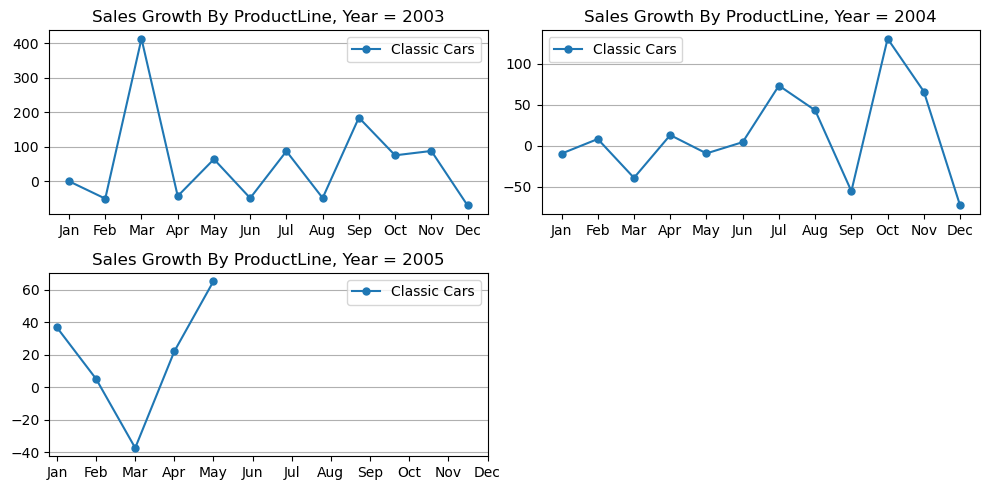

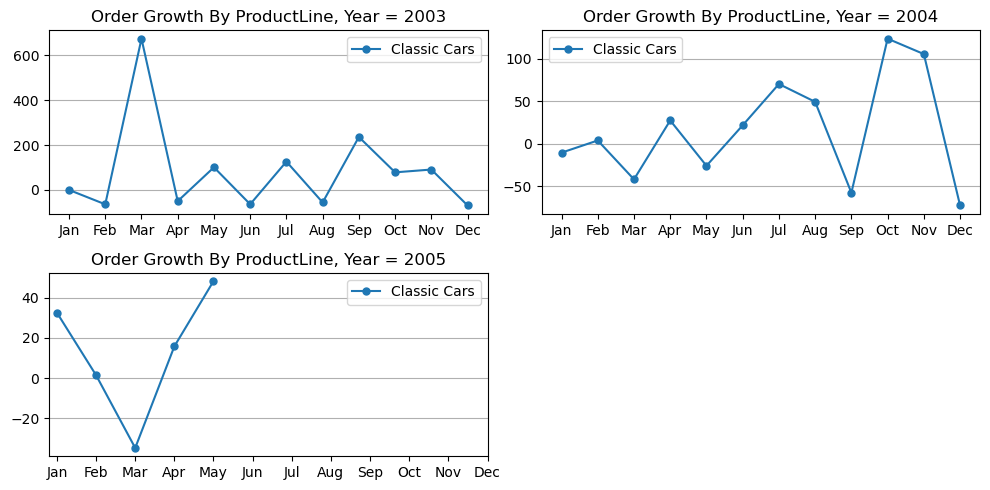

In [516]:
plt_df = df1_ProductGrowthAnalysis
plt.figure(figsize = (10,5))
productLines = plt_df['productline'].unique()
productLines = ['Motorcycles', 'Classic Cars', 'Trucks and Buses', 'Vintage Cars', 'Planes', 'Ships', 'Trains']
productLines = ['Classic Cars']
subplot_id = 221
for iYear in u_year:
    plt.subplot(subplot_id)
    
    for iProductLine in productLines:
        this_df = plt_df.query("year_id	== {} & productline == '{}'".format(iYear, iProductLine))
        plt_x = np.flip(this_df['month_id'])
        plt_y = np.flip(this_df['sales_growth_pct'])
        bar = plt.plot(plt_x, plt_y, label = iProductLine, marker = 'o', markersize = 5)
            
    subplot_id = subplot_id + 1
    plt.title("Sales Growth By ProductLine, Year = {}".format(iYear))
    
    plt.xticks(u_month, ["{}".format(calendar.month_abbr[x]) for x in u_month], rotation = 'horizontal')
    plt.grid(axis = 'y')
    plt.legend()


plt.tight_layout()
plt.show()


plt.figure(figsize = (10,5))
subplot_id = 221
for iYear in u_year:
    plt.subplot(subplot_id)
    
    for iProductLine in productLines:
        this_df = plt_df.query("year_id	== {} & productline == '{}'".format(iYear, iProductLine))
        plt_x = np.flip(this_df['month_id'])
        plt_y = np.flip(this_df['quantityordered_growth_pct'])
        bar = plt.plot(plt_x, plt_y, label = iProductLine, marker = 'o', markersize = 5)
            
    subplot_id = subplot_id + 1
    plt.title("Order Growth By ProductLine, Year = {}".format(iYear))
    
    plt.xticks(u_month, ["{}".format(calendar.month_abbr[x]) for x in u_month], rotation = 'horizontal')
    plt.grid(axis = 'y')
    plt.legend()


plt.tight_layout()
plt.show()

## Country Analysis

In [351]:
df1.head(1)

,ordernumber,quantityordered,priceeach,orderlinenumber,sales,orderdate,status,qtr_id,month_id,year_id,productline,msrp,productcode,customername,phone,addressline1,addressline2,city,state,postalcode,country,territory,contactlastname,contactfirstname,dealsize
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,,NYC,NY,10022,USA,,Yu,Kwai,Small


In [353]:
df1['country'].unique()

array(['USA', 'France', 'Norway', 'Australia', 'Finland', 'Austria', 'UK',
       'Spain', 'Sweden', 'Singapore', 'Canada', 'Japan', 'Italy',
       'Denmark', 'Belgium', 'Philippines', 'Germany', 'Switzerland',
       'Ireland'], dtype=object)

In [354]:
# quantityordered by country
df1_CountryOrder = dimAnalysis(df1, 'country', 'quantityordered')

# sales by country
df1_CountrySales = dimAnalysis(df1, 'country', 'sales')

df1_CountryAnalysis = df1_CountrySales.merge(df1_CountryOrder, on = ['country'])
df1_CountryAnalysis

,country,sales_sum,sales_avg,sales_pct,quantityordered_sum,quantityordered_avg,quantityordered_pct
,,,,,,,
0,USA,3627982.83,3613.53,36.16,35659,35.52,35.99
1,Spain,1215686.92,3554.64,12.12,12429,36.34,12.55
2,France,1110916.52,3537.95,11.07,11090,35.32,11.19
3,Australia,630623.10,3408.77,6.29,6246,33.76,6.30
4,UK,478880.46,3325.56,4.77,5013,34.81,5.06
5,Italy,374674.31,3315.70,3.73,3773,33.39,3.81
6,Finland,329581.91,3582.41,3.29,3192,34.70,3.22
7,Norway,307463.70,3617.22,3.06,2842,33.44,2.87
8,Singapore,288488.41,3651.75,2.88,2760,34.94,2.79


#### Visualization

In [307]:
np.random.shuffle(color_palette_50)

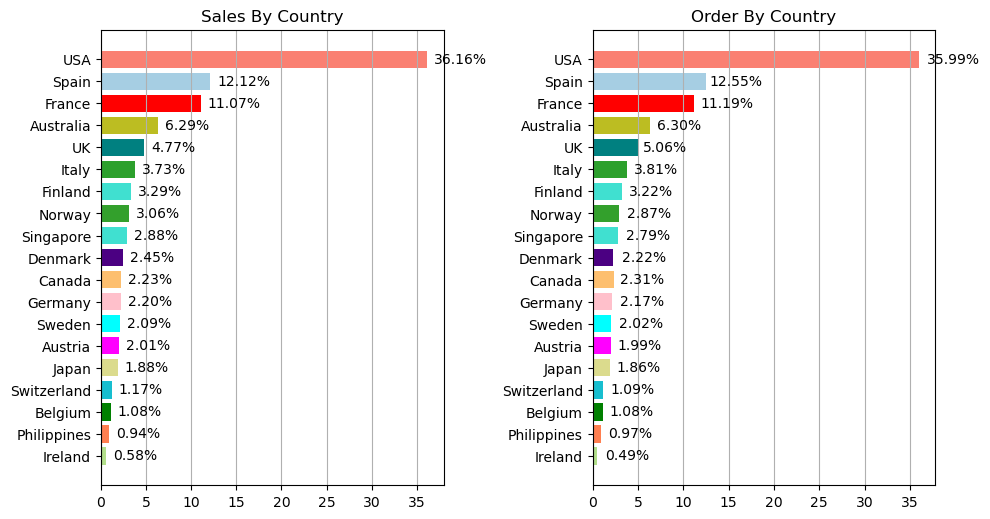

In [356]:
plt_df = df1_CountryAnalysis
plt.figure(figsize = (10,10))

plt.subplot(221)
plt_x = np.flip(plt_df['country'])
plt_y = np.flip(plt_df['sales_pct'])
bar = plt.barh(plt_x, plt_y, color = color_palette_50)
plt.bar_label(bar, ["{:.2f}%".format(x) for x in plt_y], rotation = "horizontal", padding = 5, color = "#000")
plt.title("Sales By Country")
plt.xticks(rotation = 'horizontal')
plt.grid(axis = 'x')


plt.subplot(222)
plt_x = np.flip(plt_df['country'])
plt_y = np.flip(plt_df['quantityordered_pct'])
plt.barh(plt_x, plt_y, color = color_palette_50)
plt.bar_label(bar, ["{:.2f}%".format(x) for x in plt_y], rotation = "horizontal", padding = 5, color = "#000")
plt.title("Order By Country")
plt.xticks(rotation = 'horizontal')
plt.grid(axis = 'x')

plt.tight_layout()
plt.show()

#### Report

**This analysis show the orders count on country**
1. USA made the most orders - 35659 orders (35.99% of total orders)

2. Ireland customers made the least orders - 490 orders (0.49% of total orders)

## Comparision of PRICEEACH and MSRP

In [358]:
df1.head(1)

,ordernumber,quantityordered,priceeach,orderlinenumber,sales,orderdate,status,qtr_id,month_id,year_id,productline,msrp,productcode,customername,phone,addressline1,addressline2,city,state,postalcode,country,territory,contactlastname,contactfirstname,dealsize
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,,NYC,NY,10022,USA,,Yu,Kwai,Small


In [369]:
df_priceEachMsep = df1[['msrp', 'priceeach']]
df_priceEachMsep

,msrp,priceeach
0,95,95.70
1,95,81.35
2,95,94.74
3,95,83.26
4,95,100.00
5,95,96.66
6,95,86.13
7,95,100.00
8,95,98.57
9,95,100.00


#### Visualization

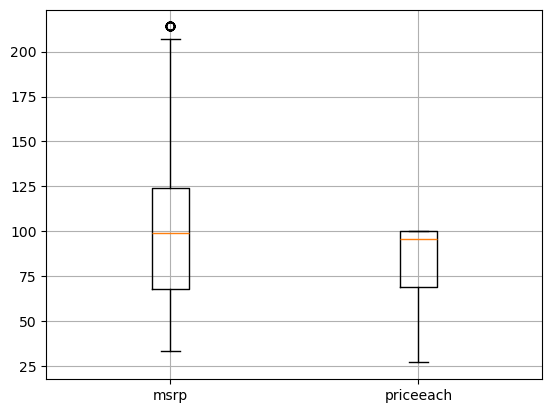

In [372]:
plt.figure()
plt.boxplot(df_priceEachMsep, tick_labels = ['msrp', 'priceeach'])
plt.grid(True)
plt.show()